In [3]:
import skimage.io
import numpy as np

import skimage.filters
import skimage.io
import skimage.morphology
from skimage.filters import (threshold_otsu, threshold_li)

In [2]:
params_dict = dict(
    nozzle_row = 1, 
    crop_width_coefficient = 0.02, 
    crop_height_coefficient = 2,
    crop_nozzle_coef = 0.15,
)    

In [19]:

nozzle_row = params_dict["nozzle_row"]
crop_width_coefficient = params_dict["crop_width_coefficient"]
crop_nozzle_coef = params_dict["crop_nozzle_coef"]
crop_height_coefficient = params_dict["crop_height_coefficient"]
background_video = skimage.io.imread_collection("example_background_video//*", plugin='tifffile')
first_frame = background_video[0]    
thresh_otsu = threshold_otsu(first_frame)
binary_otsu = first_frame < thresh_otsu
binary_otsu = np.array(binary_otsu)*255
binary_otsu = np.uint8(binary_otsu)

# Crop down to nozzle: 
## width = nozzle + 2%
## height = nozzle * 2.5
non_zero_indicies = np.nonzero(binary_otsu[nozzle_row,:])
first_non_zero = non_zero_indicies[0][0]
last_non_zero = non_zero_indicies[0][-1]
nozzle_diameter = last_non_zero - first_non_zero #pix

crop_width_start = int(first_non_zero-int(nozzle_diameter*crop_width_coefficient))
crop_width_end = int(last_non_zero+int(nozzle_diameter*crop_width_coefficient))
crop_bottom = int(nozzle_diameter*crop_height_coefficient)
crop_top = int(nozzle_diameter*crop_nozzle_coef)
params_dict["crop_width_start"] = crop_width_start
params_dict["crop_width_end"] = crop_width_end
params_dict["crop_bottom"] = crop_bottom
params_dict["crop_top"] = crop_top


In [20]:
params_dict

{'nozzle_row': 1,
 'crop_width_coefficient': 0.02,
 'crop_height_coefficient': 2,
 'crop_nozzle_coef': 0.15,
 'crop_width_start': 86,
 'crop_width_end': 415,
 'crop_bottom': 634,
 'crop_top': 47}

In [9]:
    bg_median = np.median(background_video, axis=0)
    bg_median = bg_median[nozzle_row+crop_top:crop_bottom+crop_top, crop_width_start:crop_width_end]

In [10]:
bg_median

array([[3858., 3840., 3865., ..., 4012., 3977., 4010.],
       [3822., 3826., 3822., ..., 4011., 3986., 3997.],
       [3840., 3826., 3835., ..., 4025., 4017., 4010.],
       ...,
       [  80.,   83.,   79., ...,   78.,   74.,   75.],
       [  79.,   82.,   77., ...,   78.,   73.,   73.],
       [  76.,   77.,   79., ...,   76.,   78.,   73.]])

C:\Users\Rob\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


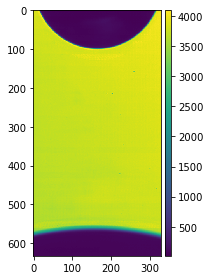

In [12]:
skimage.io.imshow(bg_median)

In [14]:
np.save('bg_median_array', bg_median)

In [17]:
a = np.load('bg_median_array.npy')

In [18]:
background_video = skimage.io.imread_collection("example_background_video//*", plugin='tifffile')

In [21]:
background_video = skimage.io.imread_collection("//example_background_video//*",
 plugin='tifffile')

In [23]:
background_video[0]

IndexError: There are only 0 images in the collection

In [24]:
a == bg_median

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [26]:
np.all(bg_median == a)

True